<a href="https://colab.research.google.com/github/Laeti-dev/P7-Sentiments_analysis/blob/master/P7_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided CSV data containing tweets, extract key insights, clean the data, handle null values, train a simple regression model for sentiment analysis (0-1), and analyze the model results to draw further insights.

## Load data

### Subtask:
Load the tweets data from the CSV file into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the data from the CSV file into a DataFrame, and display the first few rows and the info to inspect the data.

**About this file**:
This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

- *target*: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- *ids*: The id of the tweet ( 2087)
- *date*: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- *flag*: The query (lyx). If there is no query, then this value is NO_QUERY.
- *user*: the user that tweeted (robotickilldozr)
- *text*: the text of the tweet (Lyx is cool)



In [10]:
import pandas as pd

path = '/content/drive/MyDrive/OC/Projets/P7/data/training.1600000.processed.noemoticon.csv'
# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv(path,
                  header=None,
                  names=["target", "ids", "date", "flag", "user", "text"],
                  usecols=["target", "ids", "date", "user", "text"],  # remove flag column
                  parse_dates=["date"],
                  encoding="utf-8",
                  encoding_errors="replace",)

# Display the first few rows of the DataFrame and its info
display(df.head())
display(df.info())

/tmp/ipython-input-10-1691829743.py:5: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv(path,


,target,ids,date,user,text
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   user    1600000 non-null  object        
 4   text    1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.0+ MB


None

The data set has a the shape (1600000,5) without any obvious missing values

In [11]:
# Display columns and their data types
print(df.columns)
print(df.dtypes)

Index(['target', 'ids', 'date', 'user', 'text'], dtype='object')
target             int64
ids                int64
date      datetime64[ns]
user              object
text              object
dtype: object


## Clean dates

In [ ]:
# split the date column into year, month and day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df.drop(columns=['date'], inplace=True)
display(df.head())

,target,ids,user,text,year,month,day,hour
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22


## Uniqueness

In [ ]:
# prompt: Check for duplicates using ids, user

# check for duplicate ids
print(f"Number of unique ids: {df['ids'].nunique()}")
# There are no duplicate ids, the ids are unique for each tweet.
# check for duplicate users
print(f"Number of unique users: {df['user'].nunique()}")
# There are 659,752 unique users, which means many users have tweeted more than once.
# check for duplicate tweets based on user and text
duplicate_tweets = df.duplicated(subset=['user', 'text']).sum()
print(f"Number of duplicate tweets (user and text): {duplicate_tweets}")
# There are 2473 duplicate tweets based on user and text, these should be removed.
df.drop_duplicates(subset=['user', 'text'], inplace=True)
print(f"Shape of DataFrame after removing duplicates: {df.shape}")
# Display the first few rows of the DataFrame and its info
display(df.head())
display(df.info())
# After removing duplicate tweets based on user and text, the DataFrame shape is (1597527, 8) and there are still no obvious missing values.
# Display columns and their data types
print(df.columns)
df.dtypes

Number of unique ids: 1598315
Number of unique users: 659775
Number of duplicate tweets (user and text): 5255
Shape of DataFrame after removing duplicates: (1594745, 8)


,target,ids,user,text,year,month,day,hour
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22


<class 'pandas.core.frame.DataFrame'>
Index: 1594745 entries, 0 to 1599999
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1594745 non-null  int64 
 1   ids     1594745 non-null  int64 
 2   user    1594745 non-null  object
 3   text    1594745 non-null  object
 4   year    1594745 non-null  int32 
 5   month   1594745 non-null  int32 
 6   day     1594745 non-null  int32 
 7   hour    1594745 non-null  int32 
dtypes: int32(4), int64(2), object(2)
memory usage: 85.2+ MB


None

Index(['target', 'ids', 'user', 'text', 'year', 'month', 'day', 'hour'], dtype='object')


,0
target,int64
ids,int64
user,object
text,object
year,int32
month,int32
day,int32
hour,int32


## Explore data

### Subtask:

Get the number of users

In [13]:
df['user'].nunique()

659775

A user can post several tweets

### Subtask:

Get the number of tweets for each user

In [14]:
user_tweet_counts = df['user'].value_counts()

# Sort the counts in descending order and get the ranking
user_tweet_ranking = user_tweet_counts.sort_values(ascending=False)

# Display the top 10 users with the most tweets
print("Ranking of users by number of tweets (top 10):")
print(user_tweet_ranking.head(10))

Ranking of users by number of tweets (top 10):
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64


In [15]:
user_tweet_counts.describe()

,count
count,659775.000000
mean,2.425069
std,4.710913
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,549.000000


## Clean Text Data

### Subtask:
Preprocess the tweet text by removing noise such as special characters, URLs, mentions, and hashtags. Convert text to lowercase.

In [12]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions (@...)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#...) - keep the text
    text = re.sub(r'#', '', text)
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text for comparison
display(df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


## Extract Key Insights

### Subtask:
Analyze the distribution of sentiment (target) in the dataset.

Sentiment Distribution:
 target
0    800000
4    800000
Name: count, dtype: int64


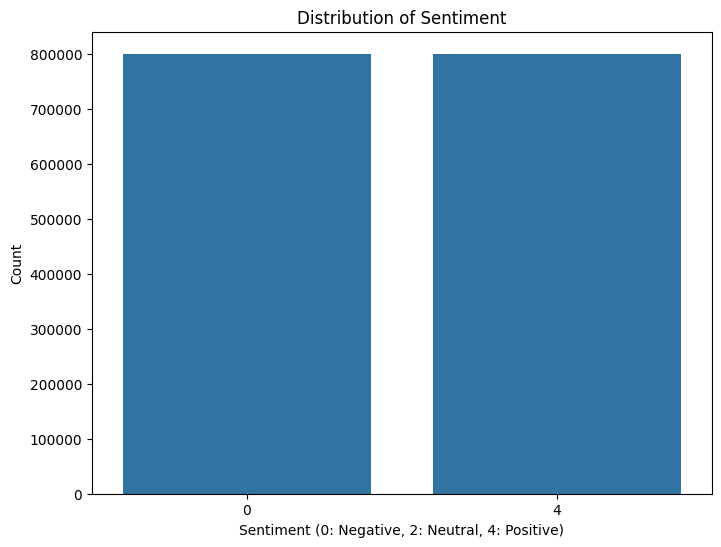

In [ ]:
# Analyze the distribution of the target variable
sentiment_distribution = df['target'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 2: Neutral, 4: Positive)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert the target variable to a 0-1 scale (0: Negative, 1: Positive)
# Assuming 0 is negative and 4 is positive, we can map 0 to 0 and 4 to 1.
df['sentiment_scaled'] = df['target'].replace({0: 0, 4: 1})

# Convert text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to avoid excessive memory usage
X = tfidf.fit_transform(df['cleaned_text'])
y = df['sentiment_scaled']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # 40% for temp (validation + test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split temp 50/50 for val and test

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (960000, 5000)
Shape of X_val: (320000, 5000)
Shape of X_test: (320000, 5000)
Shape of y_train: (960000,)
Shape of y_val: (320000,)
Shape of y_test: (320000,)


## Train a Regression Model

### Subtask:
Train a Logistic Regression model for sentiment analysis using the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
# Using solver='liblinear' for smaller datasets or when using L1/L2 penalties
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the trained Logistic Regression model using the validation data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy on validation set: {accuracy:.4f}")
print(f"Precision on validation set: {precision:.4f}")
print(f"Recall on validation set: {recall:.4f}")
print(f"F1-score on validation set: {f1:.4f}")

# Print a detailed classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

Accuracy on validation set: 0.7911
Precision on validation set: 0.7844
Recall on validation set: 0.8031
F1-score on validation set: 0.7936

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159939
           1       0.78      0.80      0.79    160061

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



## Analyze Model Results and Draw Insights

### Subtask:
Analyze the coefficients of the Logistic Regression model to identify key features (words) influencing sentiment prediction.

In [ ]:
import numpy as np

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Get the coefficients from the model
coefficients = model.coef_[0]

# Create a pandas Series to easily sort coefficients with their corresponding feature names
coef_series = pd.Series(coefficients, index=feature_names)

# Sort coefficients to find the most positive and negative words
most_positive_words = coef_series.sort_values(ascending=False).head(20)
most_negative_words = coef_series.sort_values(ascending=True).head(20)

print("Most Positive Words:\n", most_positive_words)
print("\nMost Negative Words:\n", most_negative_words)

Most Positive Words:
 smile              4.599925
wait               4.569149
worries            4.462438
thanks             4.418706
smiling            4.285717
glad               4.062103
proud              4.011641
welcome            3.918458
excited            3.901795
congratulations    3.794756
thank              3.757432
happy              3.734402
blessed            3.721079
awesome            3.632329
pleasure           3.581213
great              3.568604
yay                3.539123
relieve            3.524265
congrats           3.336563
good               3.334286
dtype: float64

Most Negative Words:
 sad             -10.836035
miss             -7.488380
sadly            -6.620533
poor             -6.567401
sucks            -6.443592
sick             -6.178159
missing          -6.086267
rip              -5.997358
bummer           -5.994578
gutted           -5.985728
hurts            -5.944836
bummed           -5.944248
died             -5.926734
unfortunately    -5.861964
wi